In [1]:
import tensorflow as tf
from tensorflow.keras import Model, Input, metrics
from tensorflow.keras import layers 
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os
print os.getcwd()
from model_application.model_list import segnet_1, segnet_2, segnet_3, fast_scnn_1, fast_scnn_2, segnet_original, fast_scnn_original
from data_processing import prepare_data

/home/tungpao0707/gcloud/Thesis


In [2]:
BATCH_SIZE= 16
INPUT_SHAPE= (256, 256, 3)
MODEL_PATH = "trained_models/"
TRAINED_MODELS=["fast_scnn_1.h5",
                "fast_scnn_2.h5", 
                "seg_resnet_1.h5",
                "seg_resnet_2.h5", 
                "segnet_1.h5", 
                "segnet_2.h5",
                "segnet_original.h5",
                "fast_scnn_original.h5"] 

In [3]:
model_0 = segnet_original.segnet_original(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_0.load_weights(MODEL_PATH+TRAINED_MODELS[6])

model_1 = segnet_1.segnet_4_encoder_decoder(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_1.load_weights(MODEL_PATH+TRAINED_MODELS[4])

model_2 = segnet_1.segnet_4_encoder_decoder(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_2.load_weights(MODEL_PATH+TRAINED_MODELS[5])

model_3 = segnet_2.segnet_resnet_v1(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_3.load_weights(MODEL_PATH+TRAINED_MODELS[2])

model_4 = segnet_3.segnet_resnet_v2(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_4.load_weights(MODEL_PATH+TRAINED_MODELS[3])

model_5 = fast_scnn_original.fast_scnn_original(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_5.load_weights(MODEL_PATH+TRAINED_MODELS[7])

model_6 = fast_scnn_1.fast_scnn_v1(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_6.load_weights(MODEL_PATH+TRAINED_MODELS[0])

model_7 = fast_scnn_2.fast_scnn_v2(input_shape=INPUT_SHAPE, batch_size=BATCH_SIZE, n_labels=2, model_summary=False)
model_7.load_weights(MODEL_PATH+TRAINED_MODELS[1])



Build enceder done..
Build decoder done..
Build enceder done..
Build decoder done..
Build enceder done..
Build decoder done..
Build enceder done..
Build decoder done..
Build enceder done..
Build decoder done..


Found 1360 images belonging to 2 classes.
Found 1360 images belonging to 2 classes.


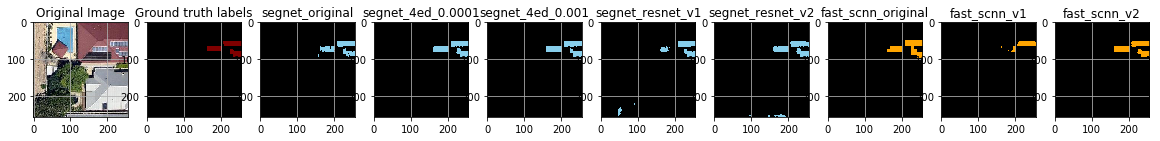

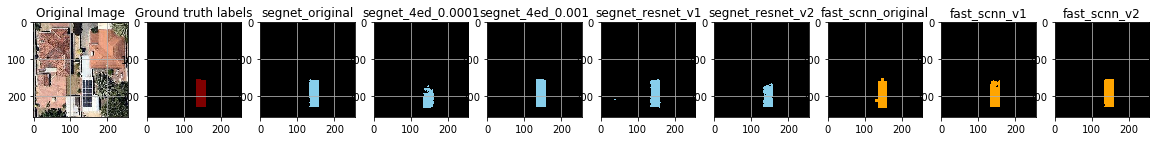

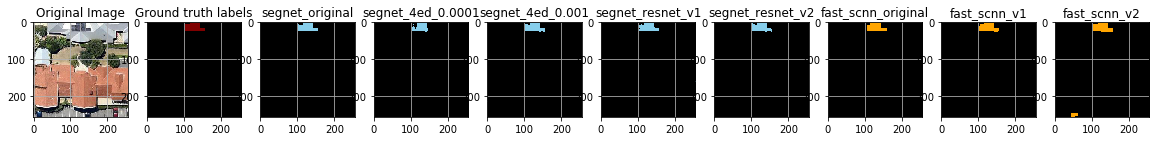

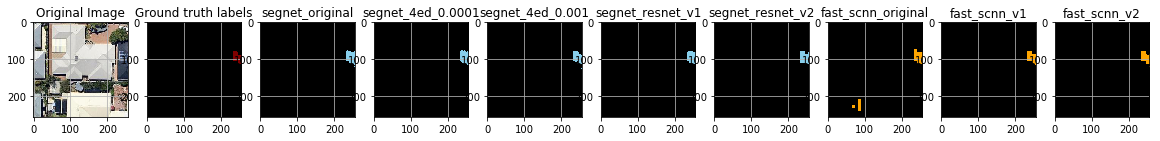

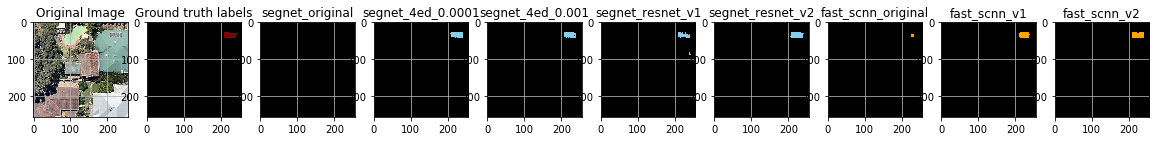

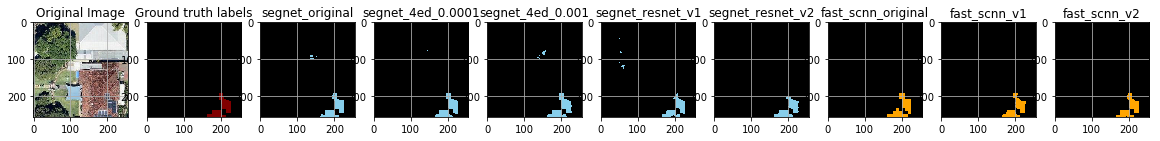

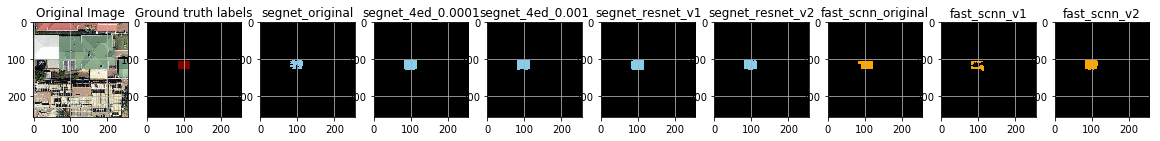

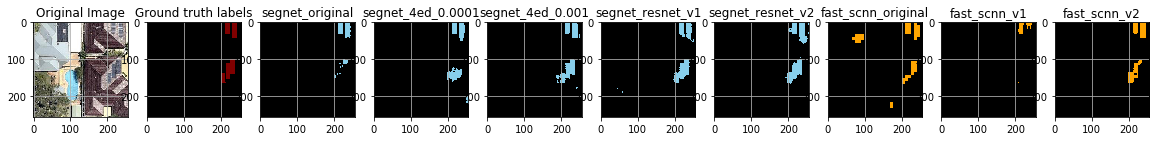

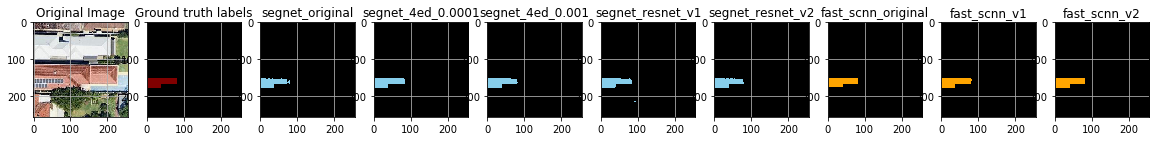

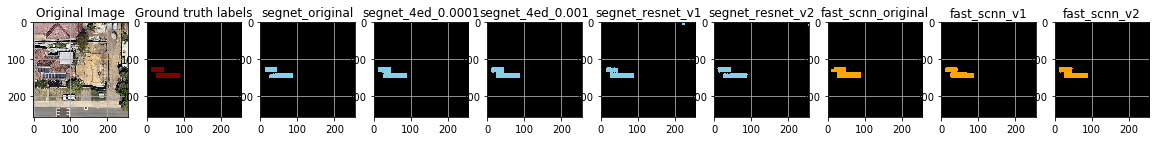

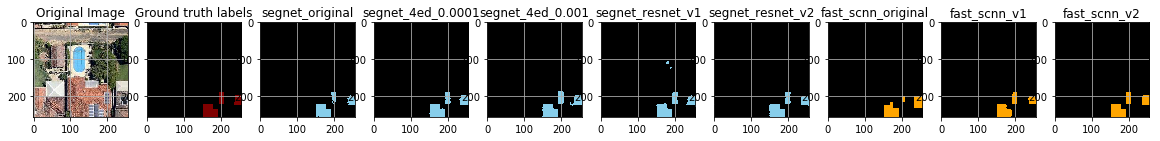

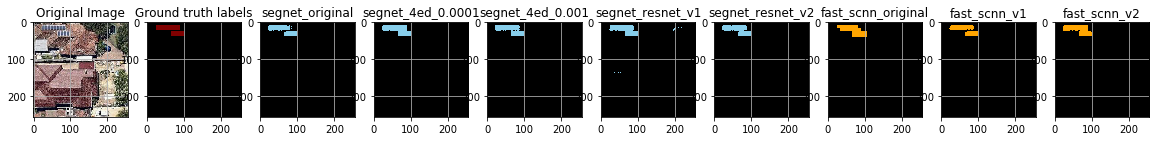

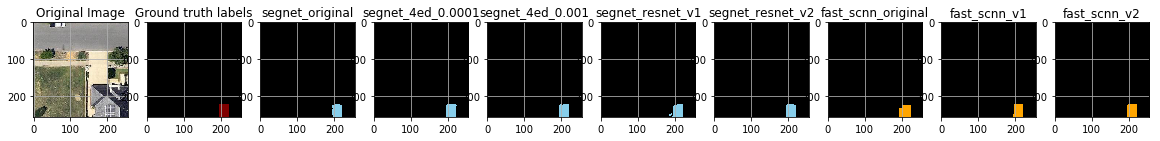

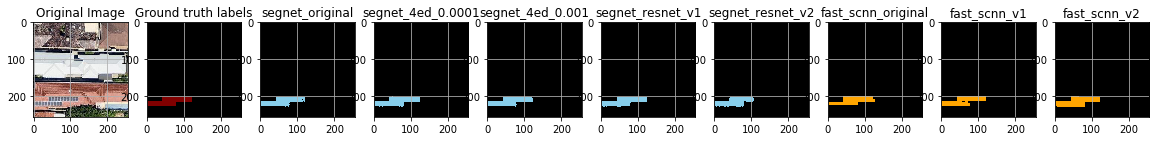

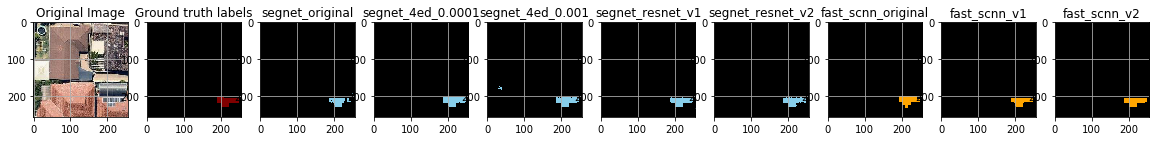

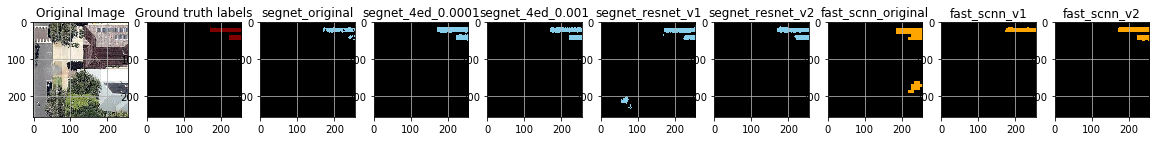

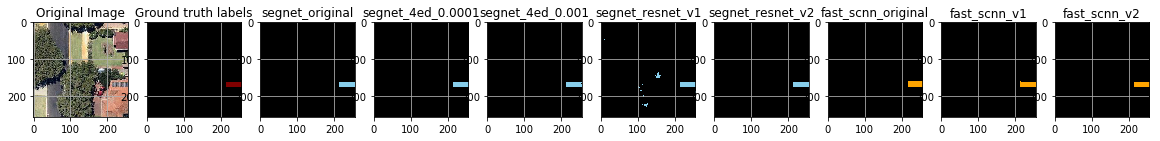

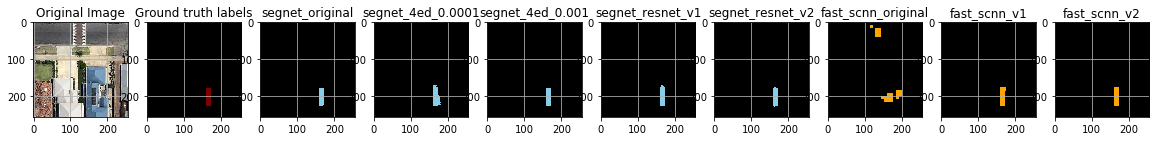

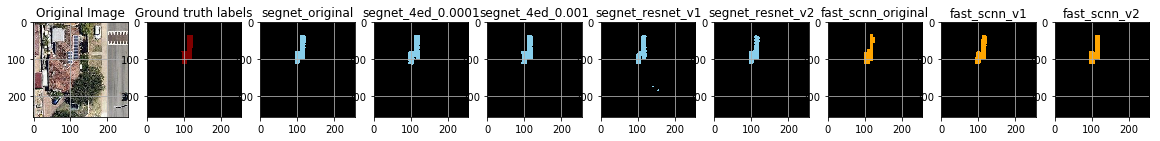

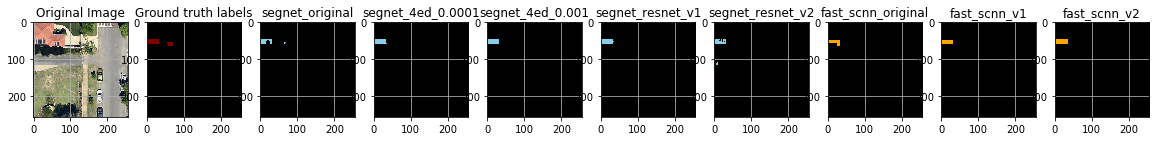

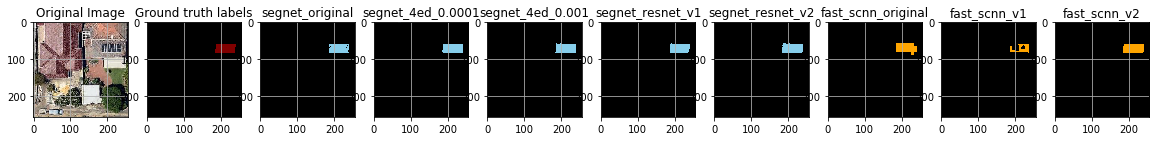

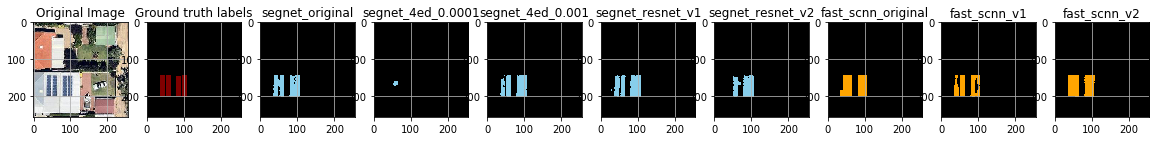

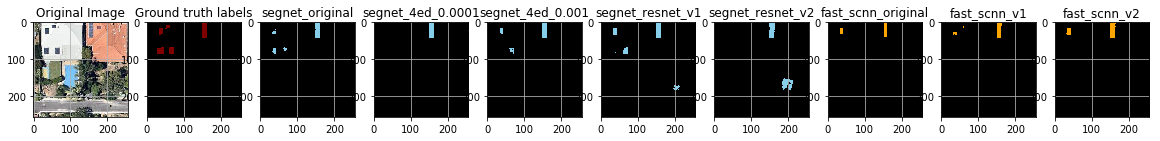

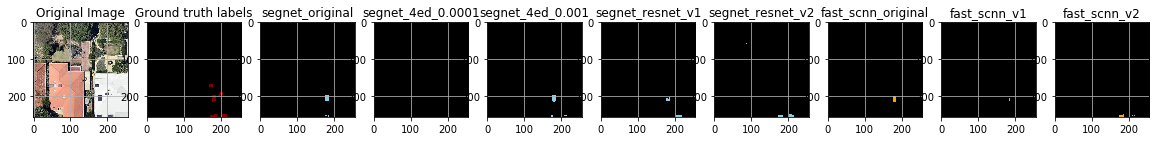

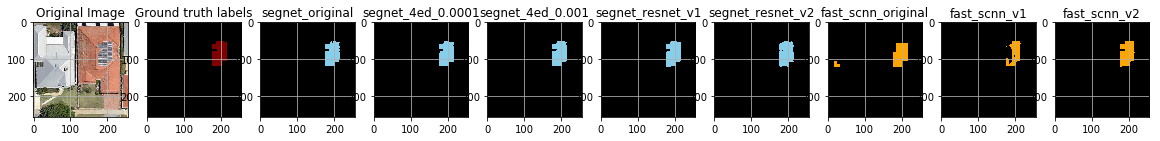

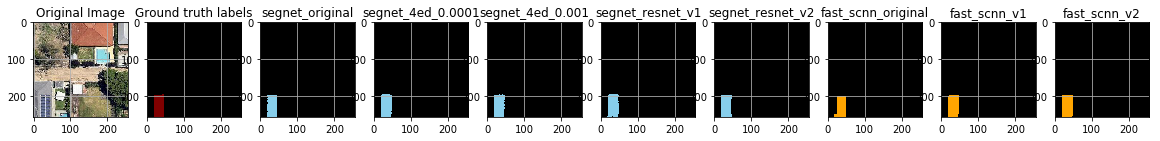

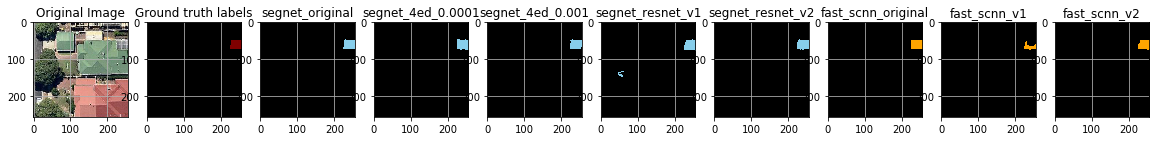

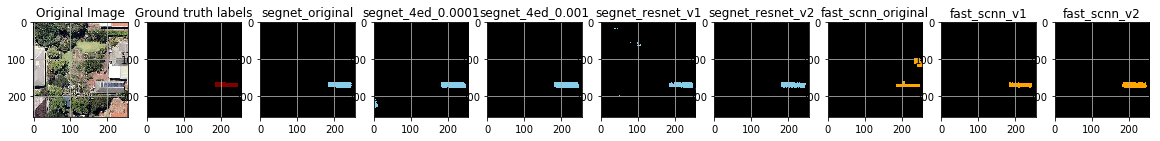

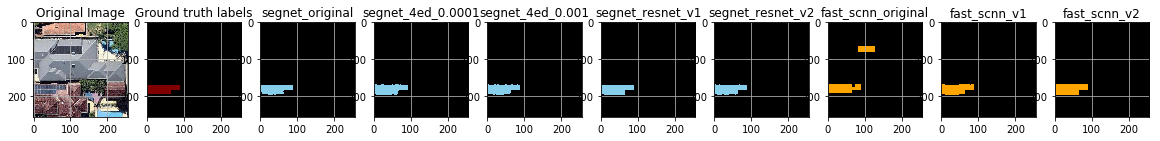

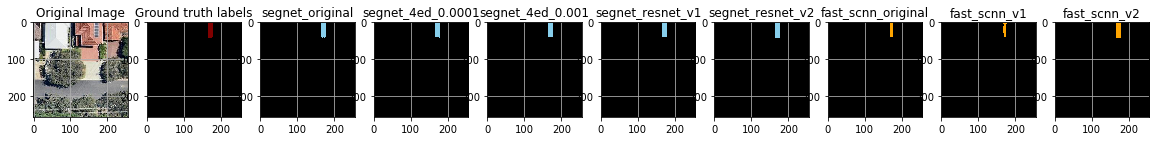

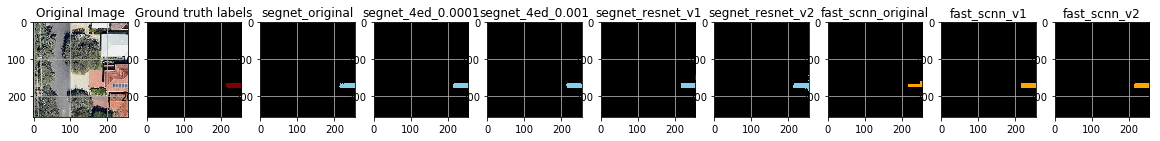

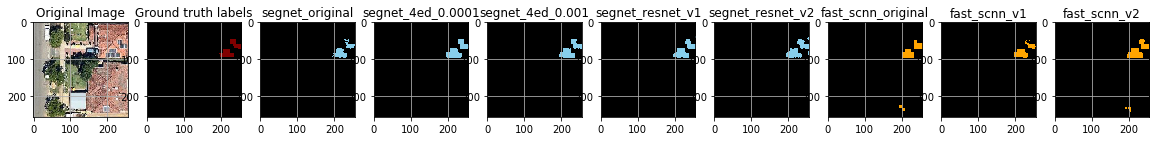

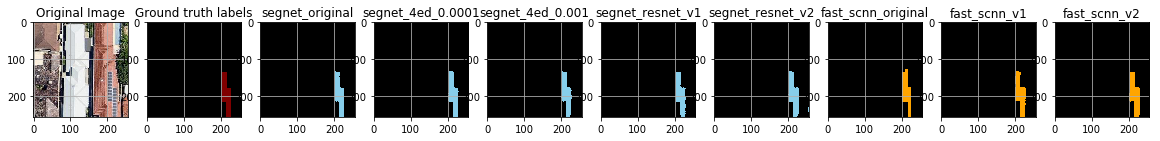

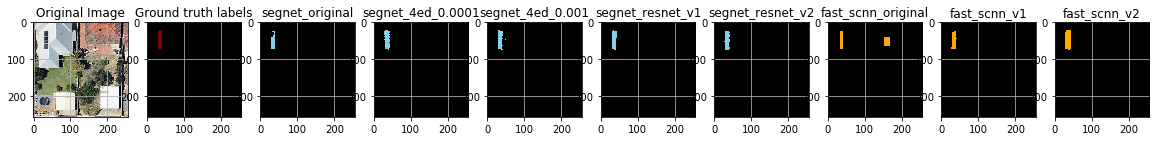

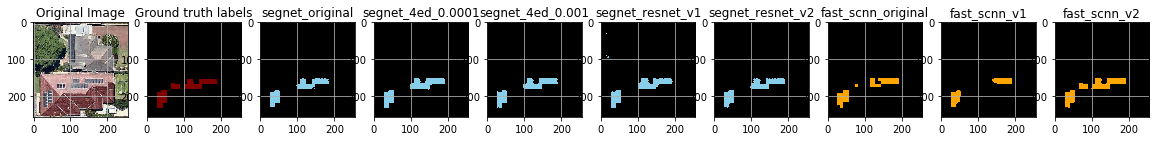

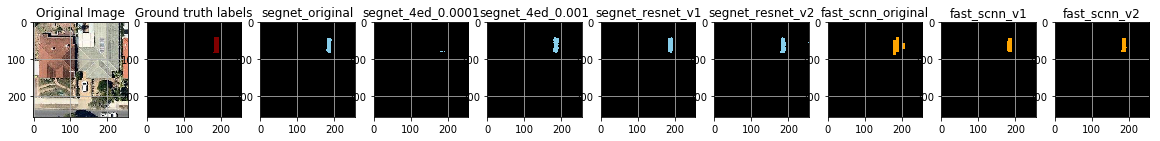

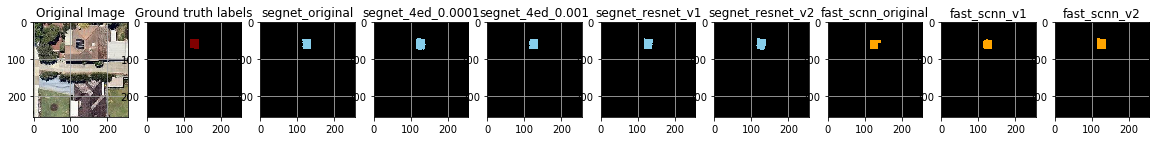

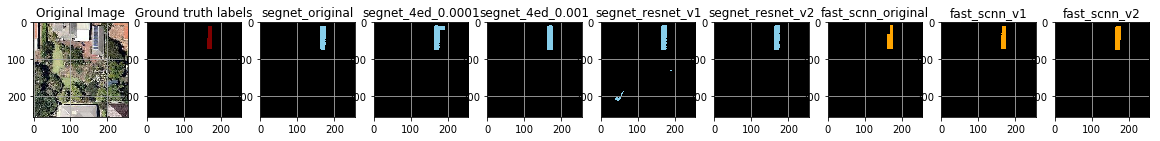

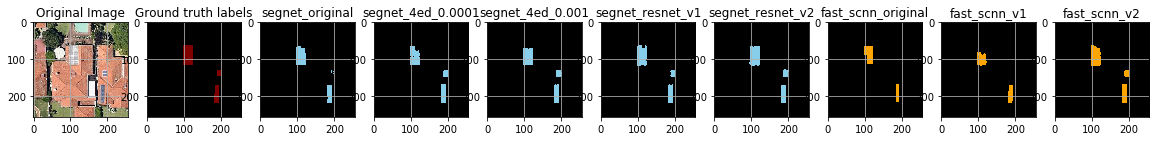

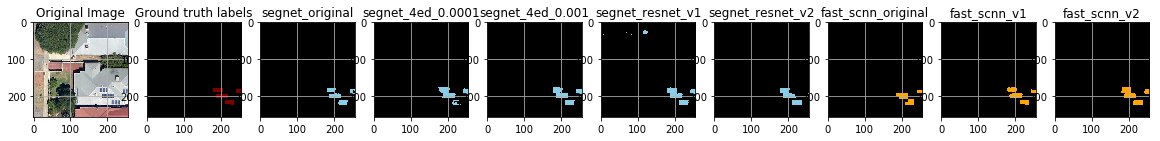

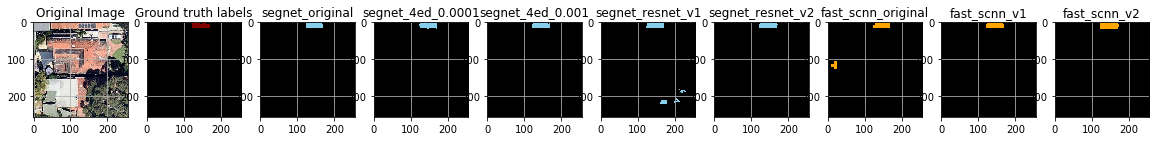

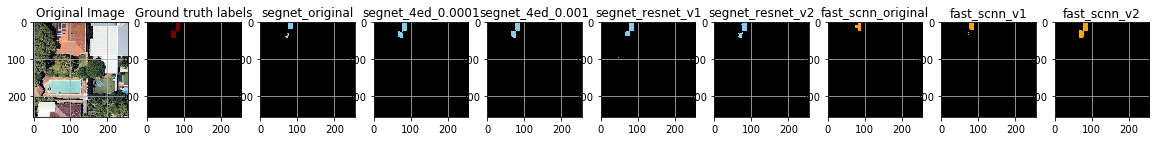

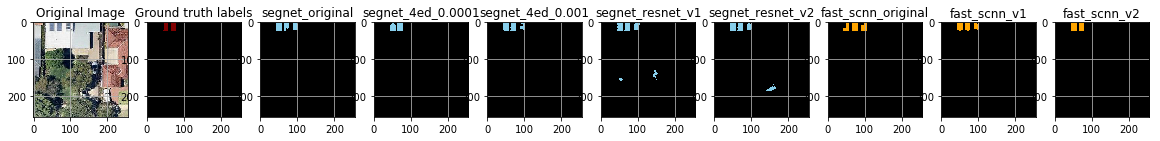

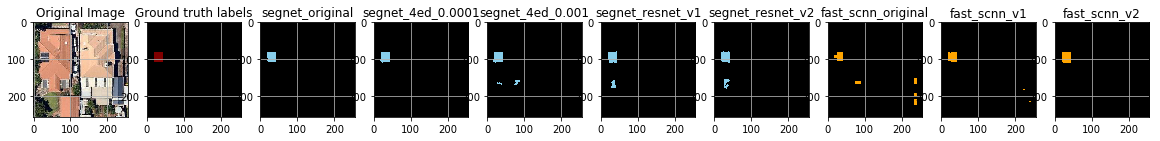

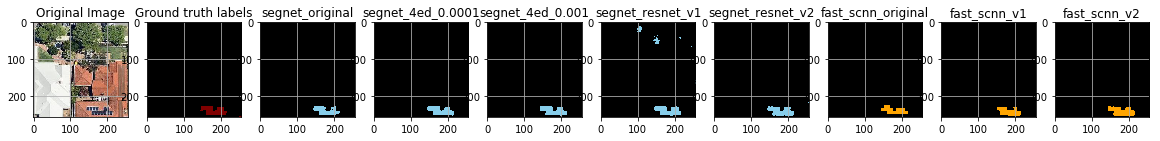

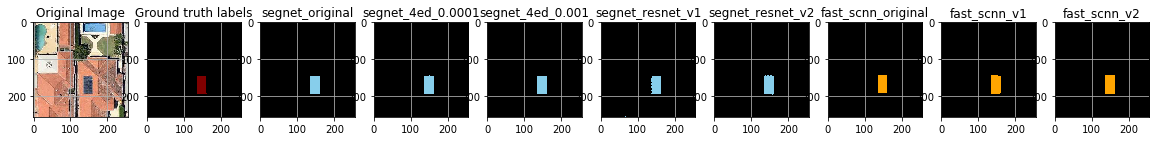

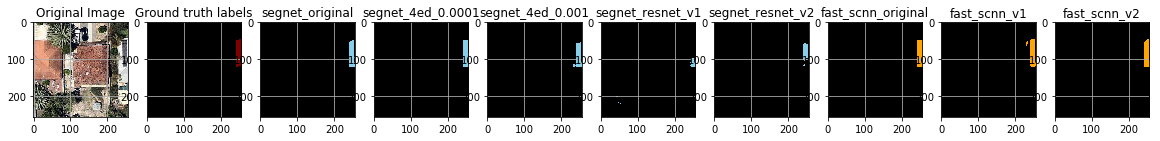

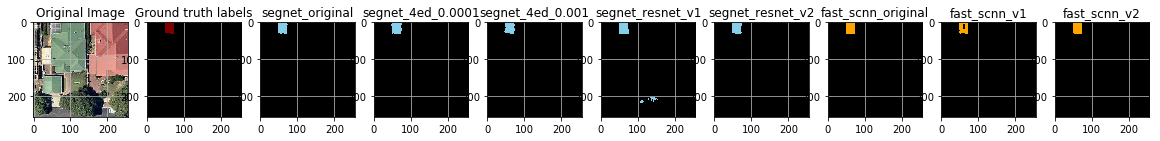

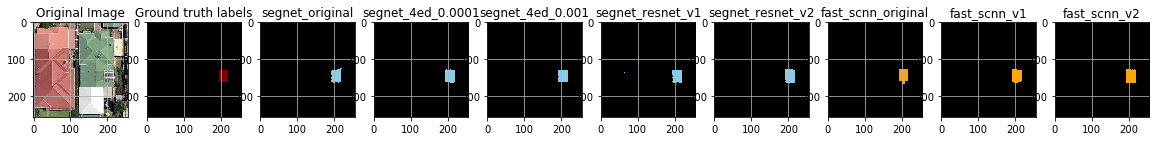

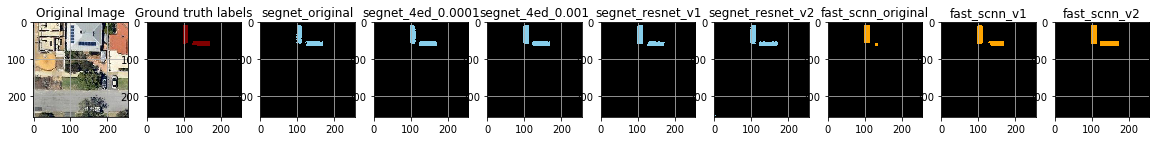

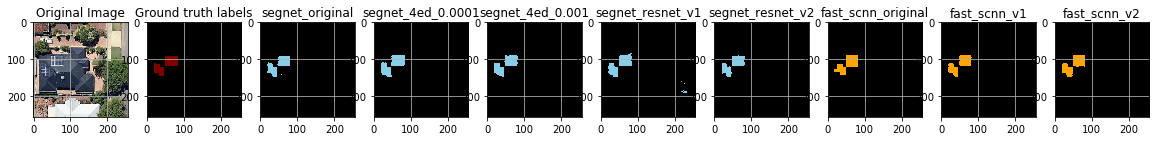

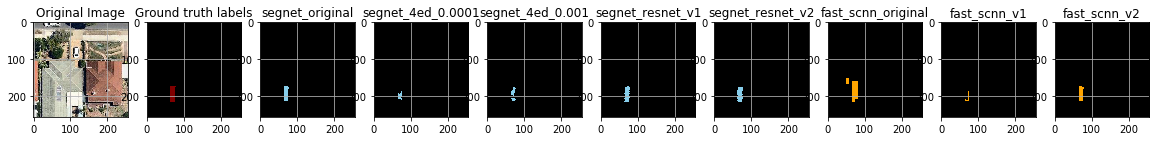

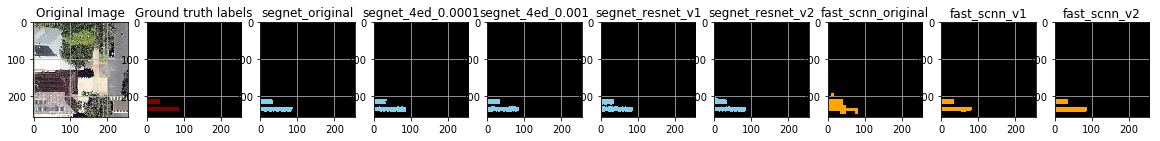

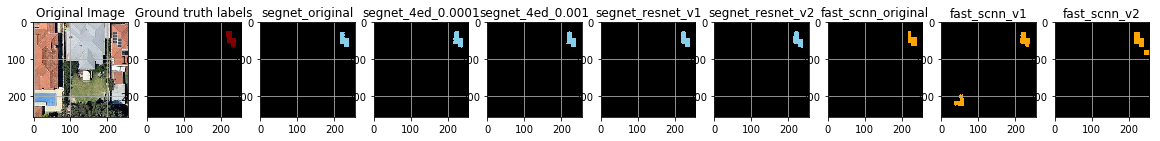

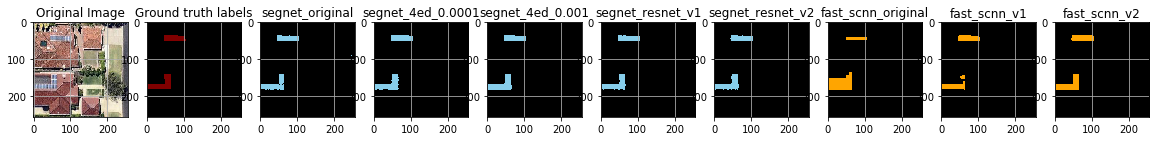

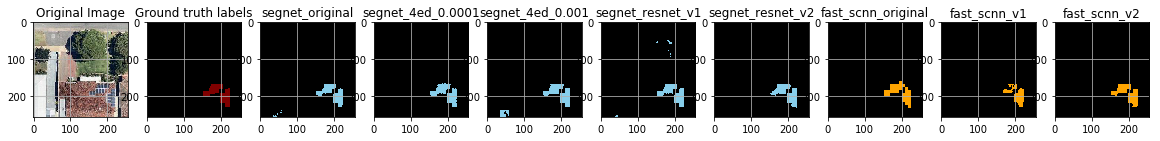

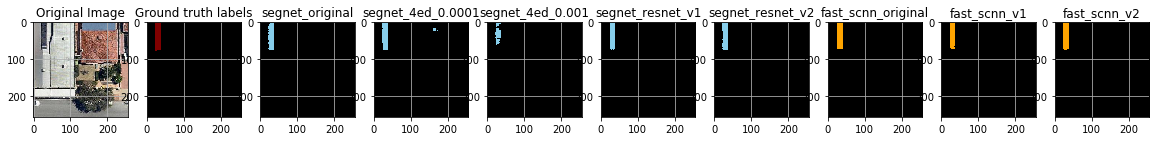

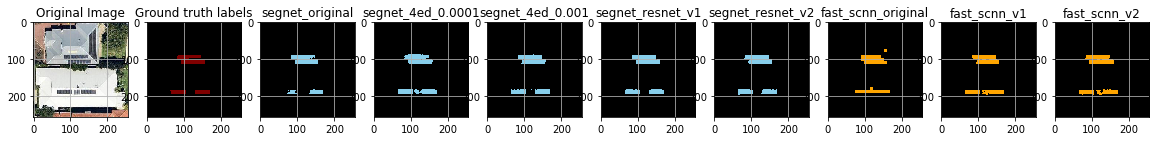

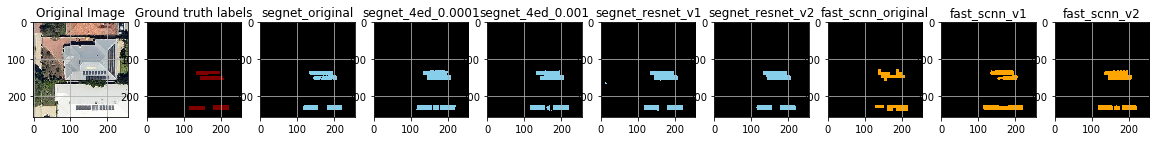

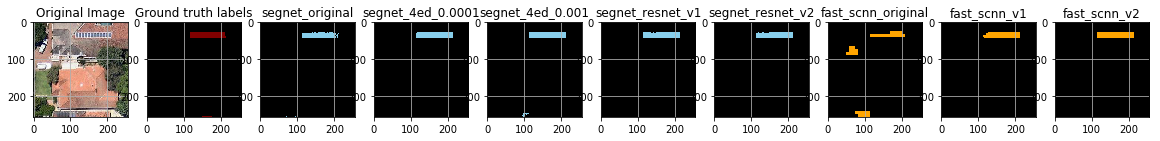

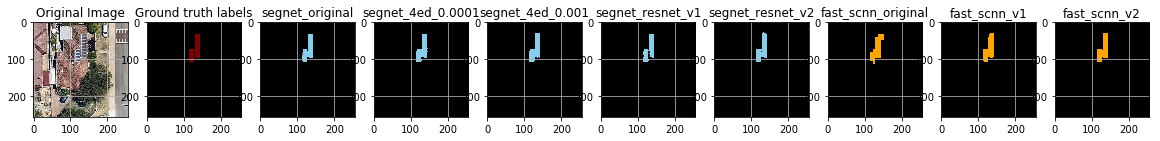

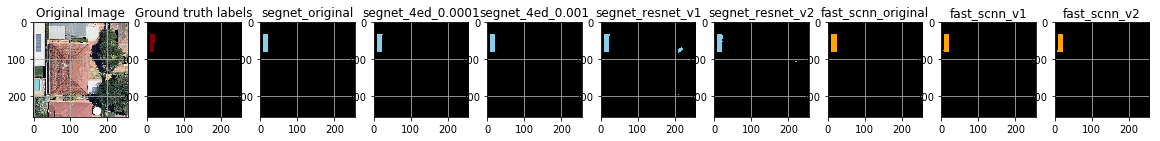

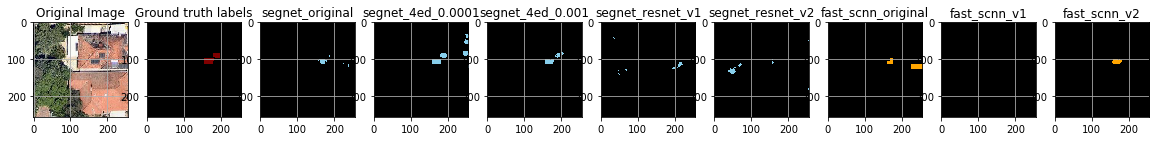

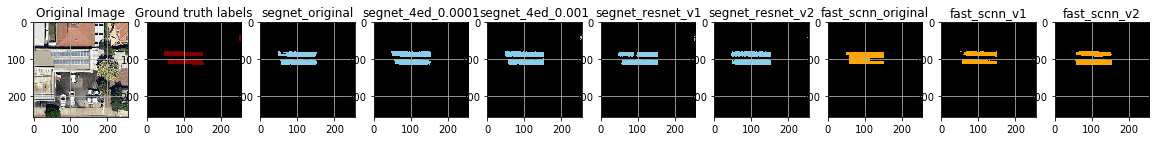

In [5]:
flag=4
testing_gen = prepare_data.test_data_generator(batch_size=16, seed=58)#58
segnet_color_code={0: (0, 0, 0), 1: (135,206,235)}
fast_scnn_color_code={0: (0, 0, 0), 1: (255,165,0)}
while(flag>0):
    flag=flag-1
    batch_img, batch_mask= next(testing_gen)
    pred_all_0 = model_0.predict(batch_img)
    pred_all_1 = model_1.predict(batch_img)
    pred_all_2 = model_2.predict(batch_img)
    pred_all_3 = model_3.predict(batch_img)
    pred_all_4 = model_4.predict(batch_img)
    pred_all_5 = model_5.predict(batch_img)
    pred_all_6 = model_6.predict(batch_img)
    pred_all_7 = model_7.predict(batch_img)
    np.shape(pred_all_1)

    for i in range(0, np.shape(pred_all_1)[0]):
        fig = plt.figure(figsize=(20, 8))

        ax1 = fig.add_subplot(1, 10, 1)
        ax1.imshow(batch_img[i])
        ax1.title.set_text('Original Image')
        ax1.grid(b=None)

        ax2 = fig.add_subplot(1, 10, 2)
        ax2.set_title('Ground truth labels')
        ax2.imshow(prepare_data.onehot_to_rgb(batch_mask[i], prepare_data.id2code))
        ax2.grid(b=None)
        
        ax3 = fig.add_subplot(1, 10, 3)
        ax3.set_title('segnet_original')
        ax3.imshow(prepare_data.onehot_to_rgb(pred_all_0[i], segnet_color_code))
        ax3.grid(b=None)

        ax4 = fig.add_subplot(1, 10, 4)
        ax4.set_title('segnet_4ed_0.0001')
        ax4.imshow(prepare_data.onehot_to_rgb(pred_all_1[i], segnet_color_code))
        ax4.grid(b=None)
        
        ax5 = fig.add_subplot(1, 10, 5)
        ax5.set_title('segnet_4ed_0.001')
        ax5.imshow(prepare_data.onehot_to_rgb(pred_all_2[i], segnet_color_code))
        ax5.grid(b=None)
        
        ax6 = fig.add_subplot(1, 10, 6)
        ax6.set_title('segnet_resnet_v1')
        ax6.imshow(prepare_data.onehot_to_rgb(pred_all_3[i], segnet_color_code))
        ax6.grid(b=None)
        
        ax7 = fig.add_subplot(1, 10, 7)
        ax7.set_title('segnet_resnet_v2')
        ax7.imshow(prepare_data.onehot_to_rgb(pred_all_4[i], segnet_color_code))
        ax7.grid(b=None)
        
        ax8 = fig.add_subplot(1, 10, 8)
        ax8.set_title('fast_scnn_original')
        ax8.imshow(prepare_data.onehot_to_rgb(pred_all_5[i], fast_scnn_color_code))
        ax8.grid(b=None)
        
        ax9 = fig.add_subplot(1, 10, 9)
        ax9.set_title('fast_scnn_v1')
        ax9.imshow(prepare_data.onehot_to_rgb(pred_all_6[i], fast_scnn_color_code))
        ax9.grid(b=None)
        
        ax10 = fig.add_subplot(1, 10, 10)
        ax10.set_title('fast_scnn_v2')
        ax10.imshow(prepare_data.onehot_to_rgb(pred_all_7[i], fast_scnn_color_code))
        ax10.grid(b=None)
        
        plt.show()

Found 47 images belonging to 1 classes.


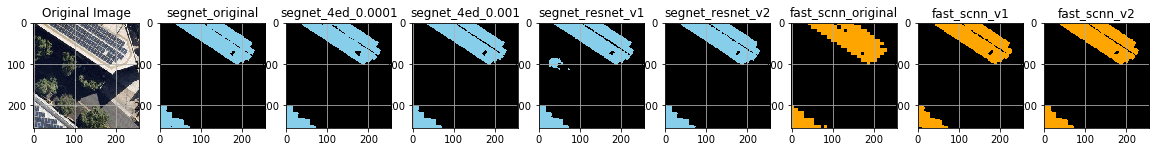

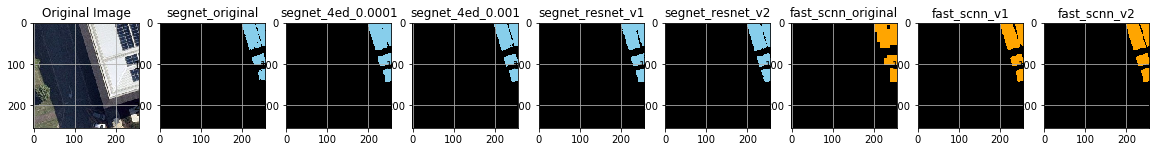

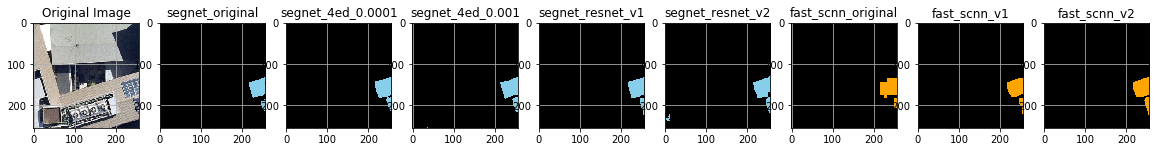

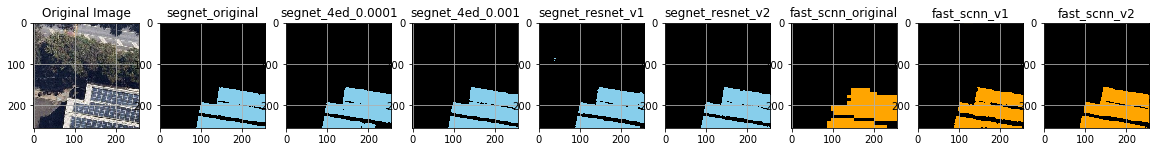

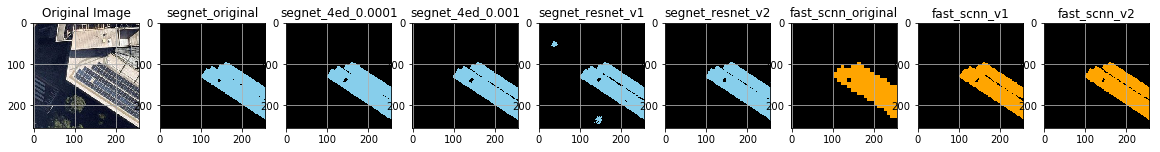

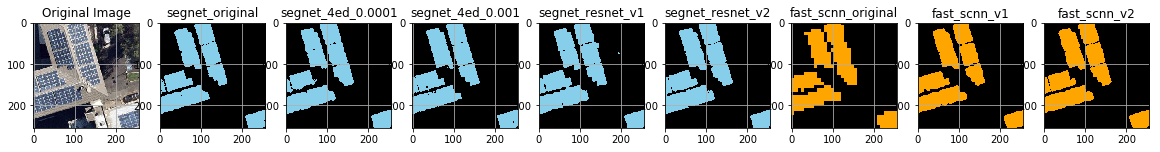

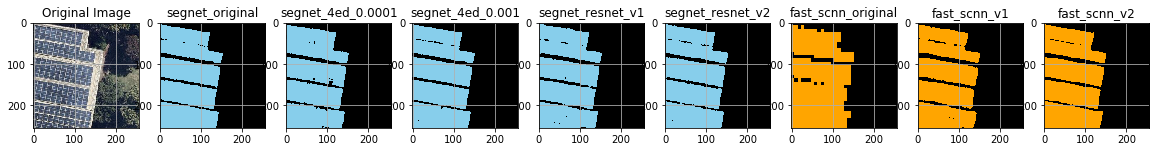

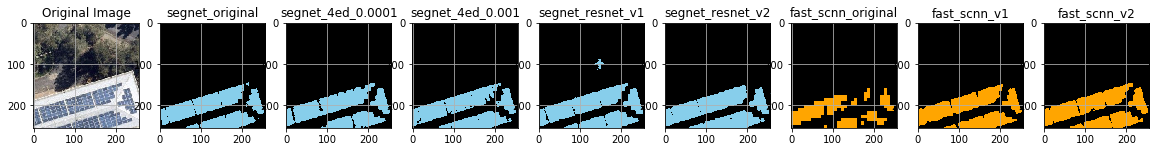

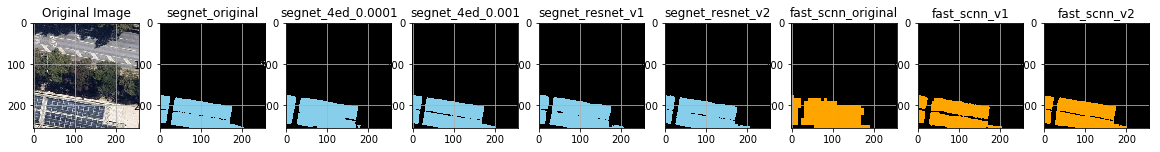

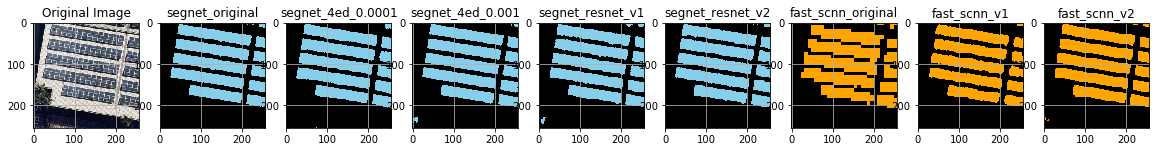

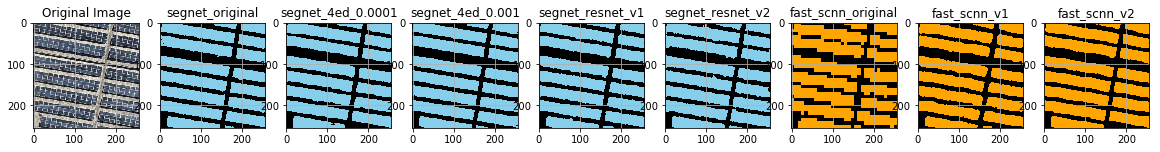

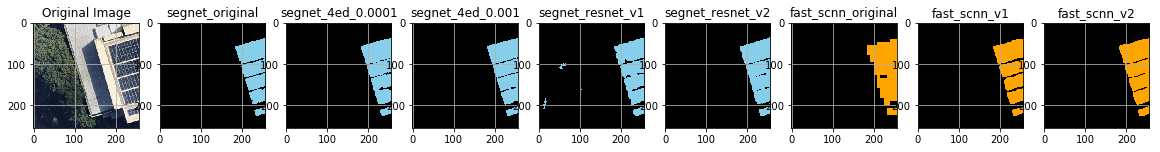

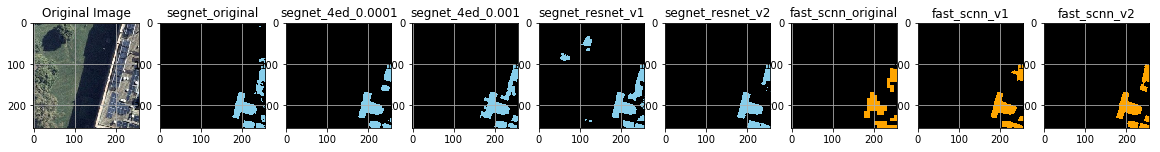

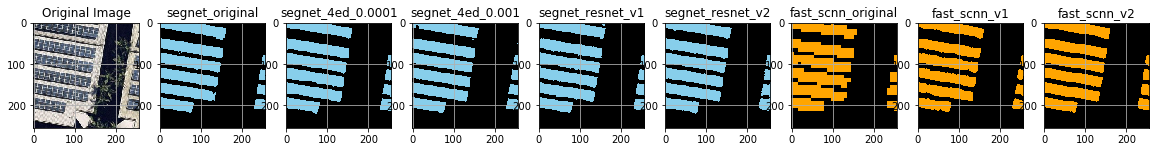

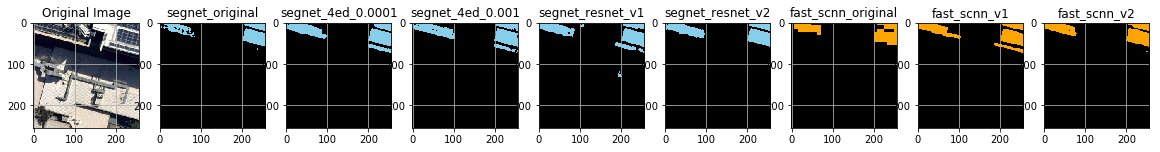

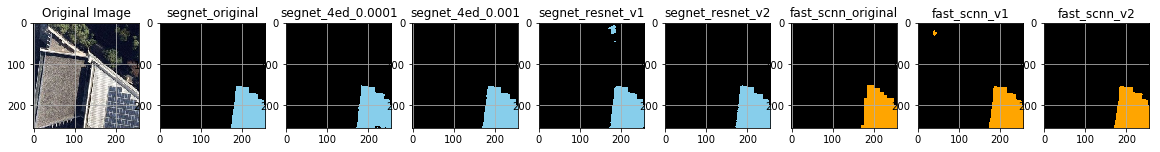

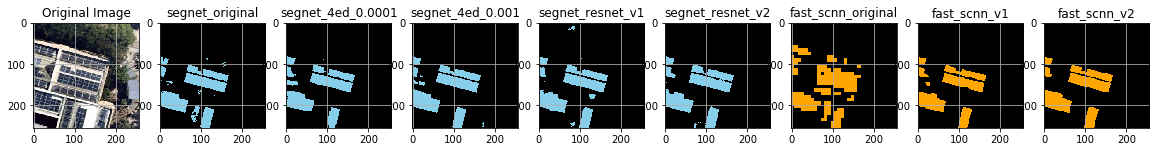

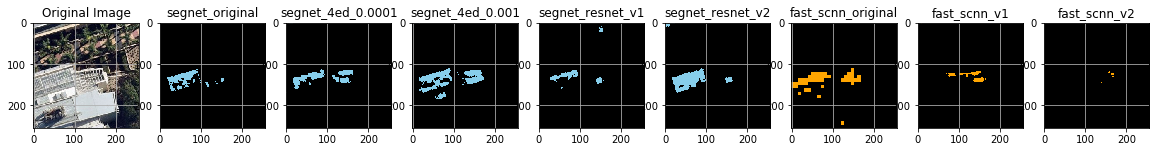

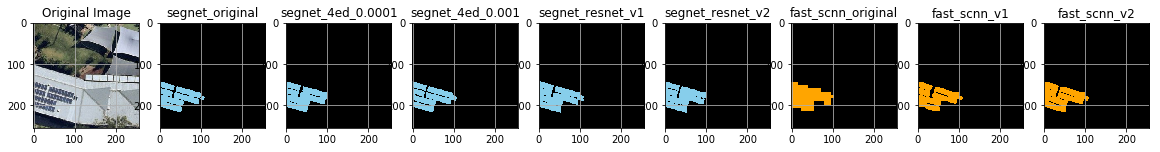

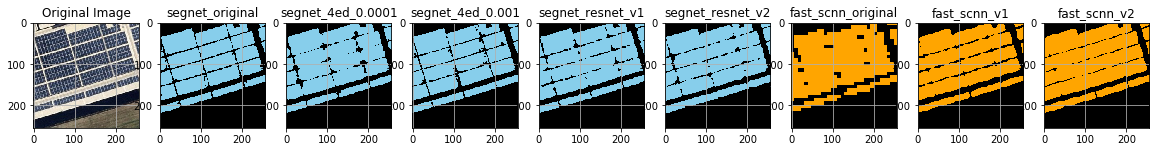

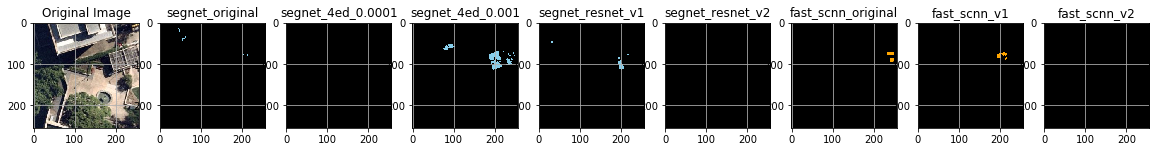

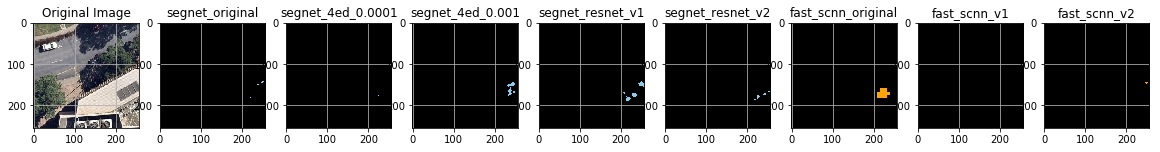

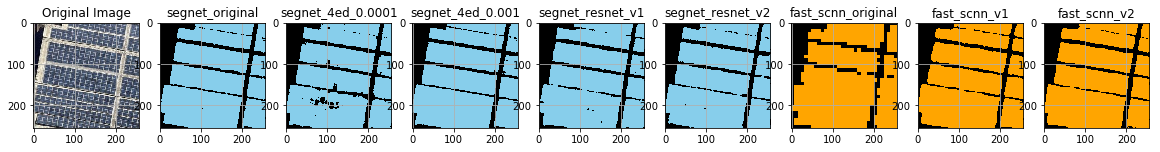

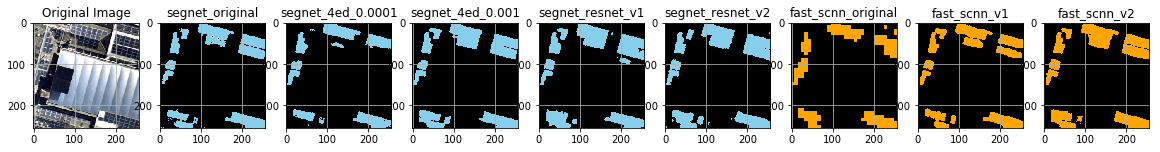

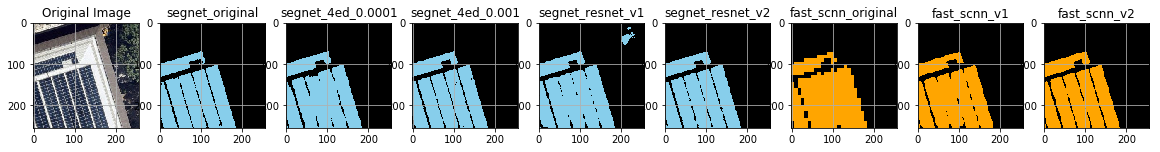

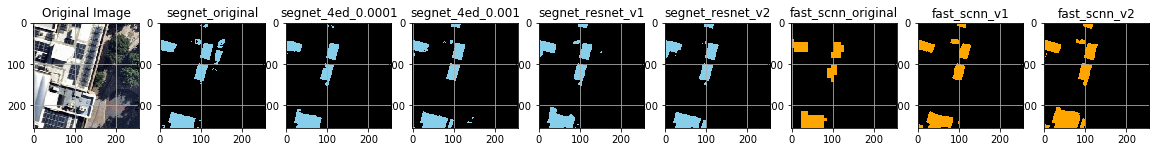

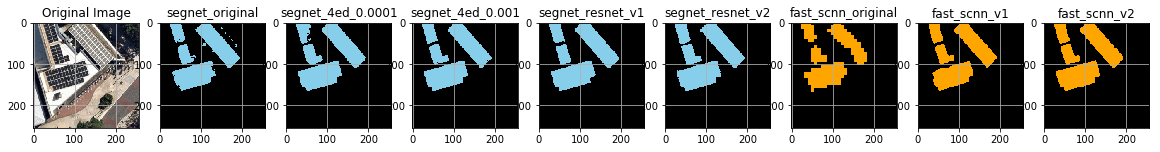

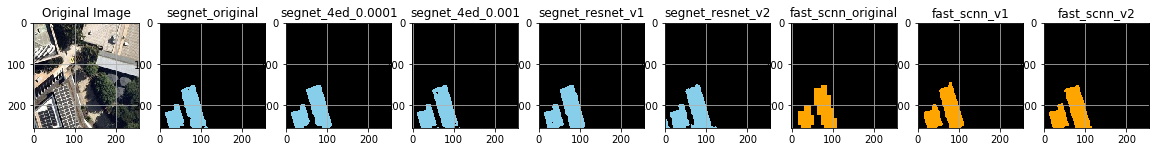

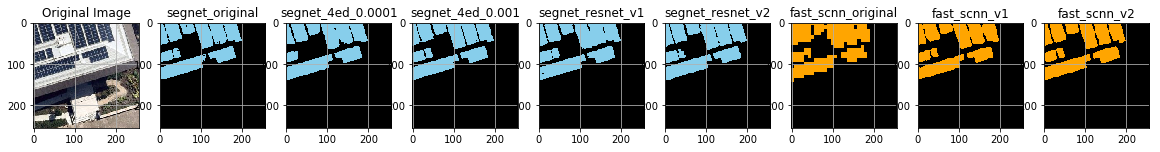

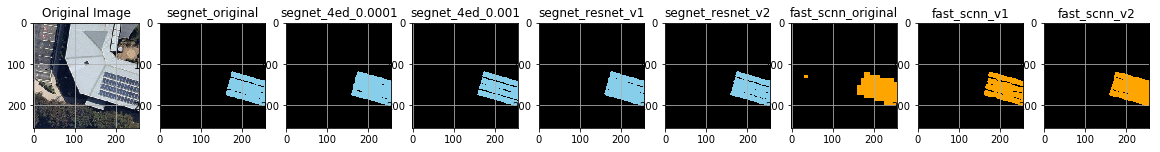

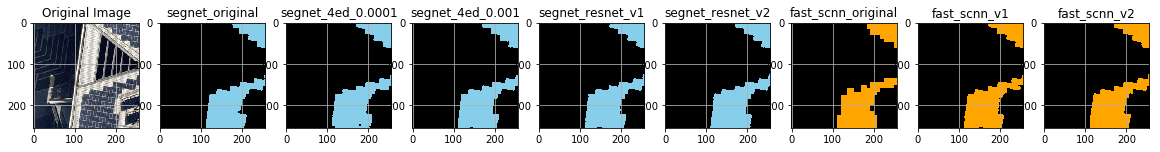

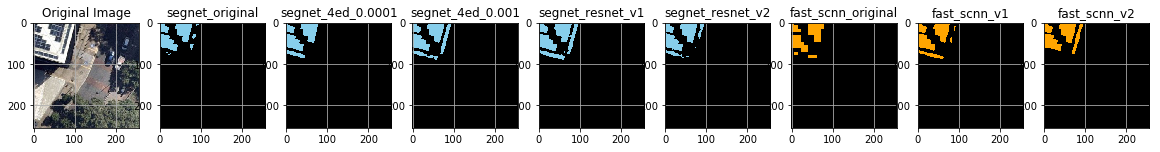

In [6]:
flag=2
testing_gen = prepare_data.images_without_label_data_generator(batch_size=16, seed=59)
segnet_color_code={0: (0, 0, 0), 1: (135,206,235)}
fast_scnn_color_code={0: (0, 0, 0), 1: (255,165,0)}
while(flag>0):
    flag=flag-1
    batch_img= next(testing_gen)
    pred_all_0 = model_0.predict(batch_img)
    pred_all_1 = model_1.predict(batch_img)
    pred_all_2 = model_2.predict(batch_img)
    pred_all_3 = model_3.predict(batch_img)
    pred_all_4 = model_4.predict(batch_img)
    pred_all_5 = model_5.predict(batch_img)
    pred_all_6 = model_6.predict(batch_img)
    pred_all_7 = model_7.predict(batch_img)
    np.shape(pred_all_1)

    for i in range(0, np.shape(pred_all_1)[0]):
        fig = plt.figure(figsize=(20, 8))

        ax1 = fig.add_subplot(1, 9, 1)
        ax1.imshow(batch_img[i])
        ax1.title.set_text('Original Image')
        ax1.grid(b=None)
        
        ax3 = fig.add_subplot(1, 9, 2)
        ax3.set_title('segnet_original')
        ax3.imshow(prepare_data.onehot_to_rgb(pred_all_0[i], segnet_color_code))
        ax3.grid(b=None)

        ax4 = fig.add_subplot(1, 9, 3)
        ax4.set_title('segnet_4ed_0.0001')
        ax4.imshow(prepare_data.onehot_to_rgb(pred_all_1[i], segnet_color_code))
        ax4.grid(b=None)
        
        ax5 = fig.add_subplot(1, 9, 4)
        ax5.set_title('segnet_4ed_0.001')
        ax5.imshow(prepare_data.onehot_to_rgb(pred_all_2[i], segnet_color_code))
        ax5.grid(b=None)
        
        ax6 = fig.add_subplot(1, 9, 5)
        ax6.set_title('segnet_resnet_v1')
        ax6.imshow(prepare_data.onehot_to_rgb(pred_all_3[i], segnet_color_code))
        ax6.grid(b=None)
        
        ax7 = fig.add_subplot(1, 9, 6)
        ax7.set_title('segnet_resnet_v2')
        ax7.imshow(prepare_data.onehot_to_rgb(pred_all_4[i], segnet_color_code))
        ax7.grid(b=None)
        
        ax8 = fig.add_subplot(1, 9, 7)
        ax8.set_title('fast_scnn_original')
        ax8.imshow(prepare_data.onehot_to_rgb(pred_all_5[i], fast_scnn_color_code))
        ax8.grid(b=None)
        
        ax9 = fig.add_subplot(1, 9, 8)
        ax9.set_title('fast_scnn_v1')
        ax9.imshow(prepare_data.onehot_to_rgb(pred_all_6[i], fast_scnn_color_code))
        ax9.grid(b=None)
        
        ax10 = fig.add_subplot(1, 9, 9)
        ax10.set_title('fast_scnn_v2')
        ax10.imshow(prepare_data.onehot_to_rgb(pred_all_7[i], fast_scnn_color_code))
        ax10.grid(b=None)
        
        plt.show()